In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import numpy as np
import math
import cmath

In [4]:
path = "/home/jsk/cylinder/chapter3data/2021-05-06_093926" 

In [5]:
infile = os.path.join(path, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 5000
--field_type lattice
--method  sequential
--alpha -1
--C 1
--u 1
--n 6
--kappa 0
--gamma 1 
--temp .000001
--temp_final .000001
--intrinsic_curvature  0
--amplitude 0  
--radius 1
--wavenumber  1
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100  
--dims 50 50



In [6]:
def sort_csv(filename, dtype=float, fct=(lambda x: abs(x))):
    if dtype==complex:
        dtype = str
        data=pd.read_csv(filename, index_col=0)
        data.columns = data.columns.astype("float")
        data.index = data.index.astype("float")
        data=data.applymap(complex)
        data=data.applymap(lambda x: fct(x))
    else:
        data=pd.read_csv(filename, index_col=0, dtype=dtype)
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    return data

In [7]:
def complex_array_to_rgb(X, theme='dark', rmax=None):
    '''Takes an array of complex number and converts it to an array of [r, g, b],
    where phase gives hue and saturaton/value are given by the absolute value.
    Especially for use with imshow for complex plots.'''
    absmax = rmax or np.abs(X).max()
    Y = np.zeros(X.shape + (3,), dtype='float')
    Y[..., 0] = np.angle(X) / (2 * math.pi) % 1
    if theme == 'light':
        Y[..., 1] = np.clip(np.abs(X) / absmax, 0, 1)
        Y[..., 2] = 1
    elif theme == 'dark':
        Y[..., 1] = 1
        Y[..., 2] = np.clip(np.abs(X) / absmax, 0, 1)
    Y = matplotlib.colors.hsv_to_rgb(Y)
    return Y

def complex_heatmap(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    plt.imshow(complex_array_to_rgb(data, theme, rmax))

<AxesSubplot:>

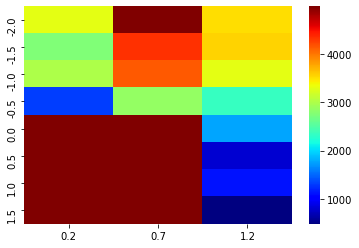

In [12]:
global_cutoff= sort_csv(path+"/global_cutoff.csv")
sb.heatmap(global_cutoff, cmap='jet')

<AxesSubplot:>

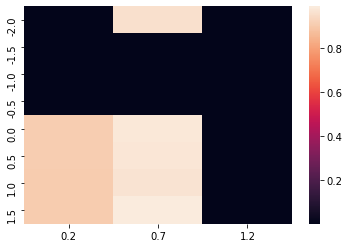

In [13]:
abs_amplitude2= sort_csv(path+"/abs_amplitude.csv")
sb.heatmap(abs_amplitude2)

<AxesSubplot:>

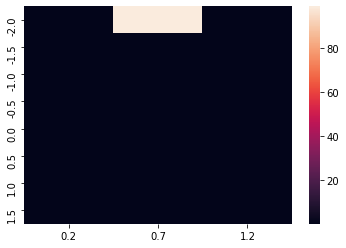

In [15]:
abs_amplitude2= sort_csv(path+"/field_energy.csv", dtype=complex)
sb.heatmap(abs_amplitude2)

<AxesSubplot:>

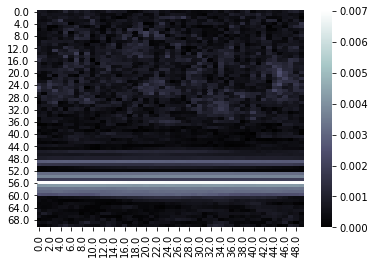

In [161]:
snapshot_0p7_1= sort_csv(path+"/wavenumber_0.7_alpha_1.5_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p7_1, cmap='bone', vmin=0)

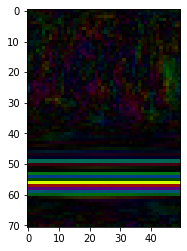

In [171]:
complex_heatmap(path+"/wavenumber_0.7_alpha_1.5_snapshot.csv")

Very small fluctutations in unordered field at this temperature.  Bigger flcutuations, with much theta-direction coherence, on smallest cells.  That's because it (correctly) has at least 0th order, ~area scaling of field energy.  The smaller cells are fluctuations in the average over a small number of things, at the same temperature.

<AxesSubplot:>

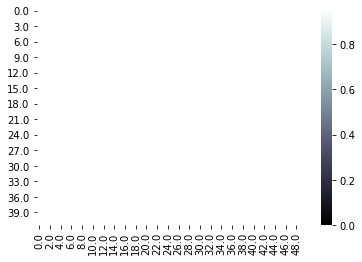

In [20]:
snapshot_1p2_m1= sort_csv(path+"/wavenumber_1.2_alpha_-1.0_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_1p2_m1, cmap='bone', vmin=0)

The one that has not (yet) reached ordered field:

<AxesSubplot:>

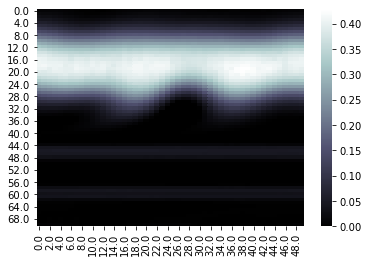

In [22]:
snapshot_0p7_m2_abs= sort_csv(path+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p7_m2_abs, cmap='bone', vmin=0)

<AxesSubplot:>

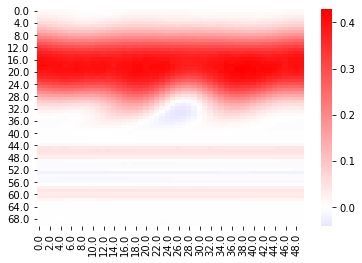

In [95]:
snapshot_0p7_m2_real= sort_csv(path+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex, fct = (lambda x: x.real))
sb.heatmap(snapshot_0p7_m2_real, cmap='bwr', center=0)

<AxesSubplot:>

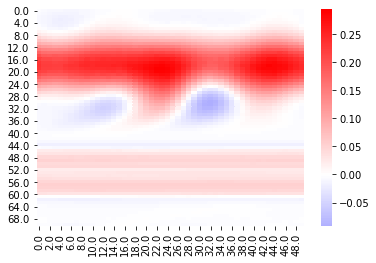

In [96]:
snapshot_0p7_m2_imag= sort_csv(path+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex, fct = (lambda x: x.imag))
sb.heatmap(snapshot_0p7_m2_imag, cmap='bwr', center=0)

This state is not a global optimum: its energy is higher than similar simulaitons.  Is it dynamically stuck or still slowly evolving?

In [51]:
time_data= pd.read_csv(path+"/wavenumber_0.7_alpha_-2.0.csv")
time_data2= pd.read_csv(path+"/wavenumber_0.7_alpha_-1.5.csv")
time_data3= pd.read_csv(path+"/wavenumber_0.7_alpha_1.5.csv")

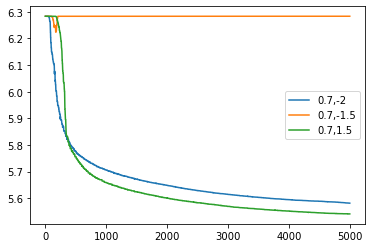

In [52]:
subject="surface_energy"
plt.plot([x*.7 for x in time_data.loc[:,subject]], label='0.7,-2')
plt.plot([x*.7 for x in time_data2.loc[:,subject]], label='0.7,-1.5')
plt.plot([x*.7 for x in time_data3.loc[:,subject]], label='0.7,1.5')
plt.legend()

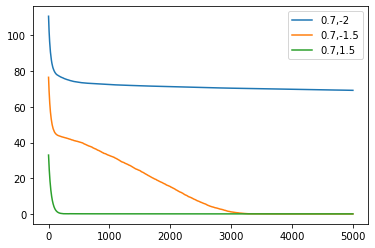

In [55]:
subject="field_energy"
plt.plot([complex(x).real*.7 for x in time_data.loc[:,subject]], label='0.7,-2')
plt.plot([complex(x).real*.7 for x in time_data2.loc[:,subject]], label='0.7,-1.5')
plt.plot([complex(x).real*.7 for x in time_data3.loc[:,subject]], label='0.7,1.5')
plt.legend()

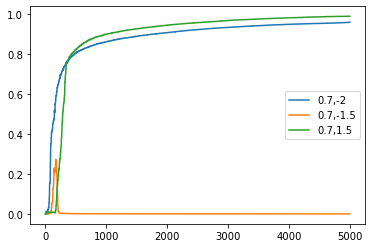

In [56]:
subject="abs_amplitude"
plt.plot([x for x in time_data.loc[:,subject]], label='0.7,-2')
plt.plot([x for x in time_data2.loc[:,subject]], label='0.7,-1.5')
plt.plot([x for x in time_data3.loc[:,subject]], label='0.7,1.5')
plt.legend()

Otherwise these states are fairly boring.  Field's influence wins out.  Try increasing temperature further and not get dynamiccal stuck at field with gradients; Try increasnig gamma to find more interesting region.  After finding more interesting region, try descreasing coupling n.

In [58]:
path2 = "/home/jsk/cylinder/chapter3data/2021-05-08_170849" 

In [75]:
infile = os.path.join(path2, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 5000
--field_type lattice
--method  sequential
--alpha -1
--C 1
--u 1
--n 6
--kappa 0
--gamma 10 
--temp .00001
--temp_final .000001
--intrinsic_curvature  0
--amplitude 0  
--radius 1
--wavenumber  1
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100  
--dims 50 50



<AxesSubplot:>

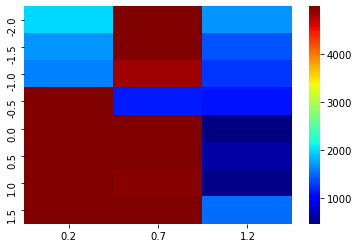

In [76]:
global_cutoff= sort_csv(path2+"/global_cutoff.csv")
sb.heatmap(global_cutoff, cmap='jet')

<AxesSubplot:>

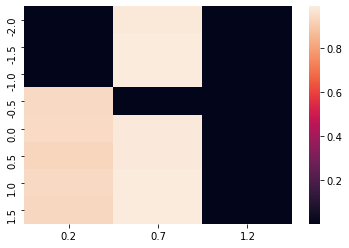

In [77]:
abs_amplitude= sort_csv(path2+"/abs_amplitude.csv")
sb.heatmap(abs_amplitude)

<AxesSubplot:>

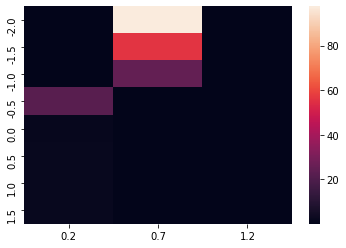

In [84]:
abs_amplitude= sort_csv(path2+"/field_energy.csv", dtype=complex)
sb.heatmap(abs_amplitude)

at 10x higher temperature, had more difficulty developing ordered field and straightened surface at k=.7

<AxesSubplot:>

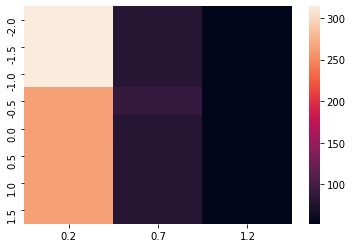

In [85]:
abs_amplitude= sort_csv(path2+"/surface_energy.csv")
sb.heatmap(abs_amplitude)

<AxesSubplot:>

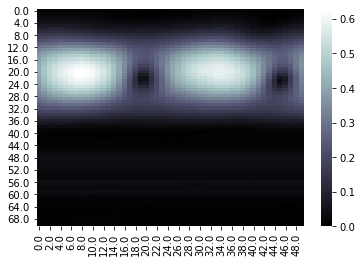

In [87]:
snapshot_0p7_m2_abs= sort_csv(path2+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p7_m2_abs, cmap='bone', vmin=0)

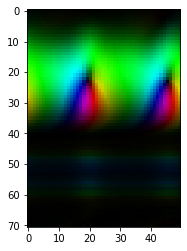

In [172]:
complex_heatmap(path2+"/wavenumber_0.7_alpha_-2.0_snapshot.csv")

<AxesSubplot:>

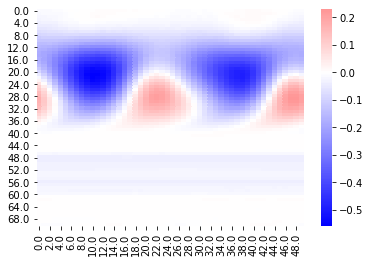

In [93]:
snapshot_0p7_m2_real= sort_csv(path2+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex, fct = (lambda x: x.real))
sb.heatmap(snapshot_0p7_m2_real, cmap='bwr', center=0)

<AxesSubplot:>

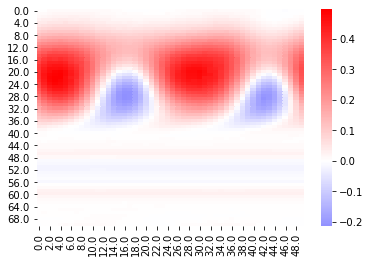

In [94]:
snapshot_0p7_m2_imag= sort_csv(path2+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex, fct = (lambda x: x.imag))
sb.heatmap(snapshot_0p7_m2_imag, cmap='bwr', center=0)

<AxesSubplot:>

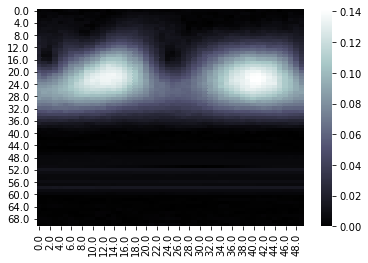

In [88]:
snapshot_0p7_m1p5_abs= sort_csv(path2+"/wavenumber_0.7_alpha_-1.5_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p7_m1p5_abs, cmap='bone', vmin=0)

<AxesSubplot:>

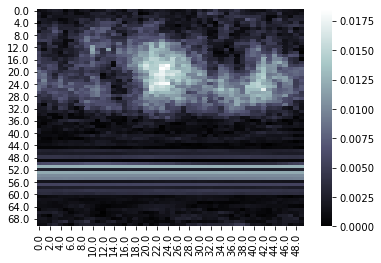

In [89]:
snapshot_0p7_m1_abs= sort_csv(path2+"/wavenumber_0.7_alpha_-1.0_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p7_m1_abs, cmap='bone', vmin=0)

Back to the original low temperature:

In [97]:
path3 = "/home/jsk/cylinder/chapter3data/2021-05-08_174248" 

<AxesSubplot:>

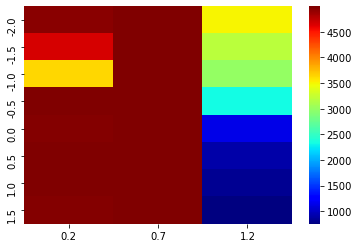

In [99]:
global_cutoff= sort_csv(path3+"/global_cutoff.csv")
sb.heatmap(global_cutoff, cmap='jet')

check for interesting rotational modes

<AxesSubplot:>

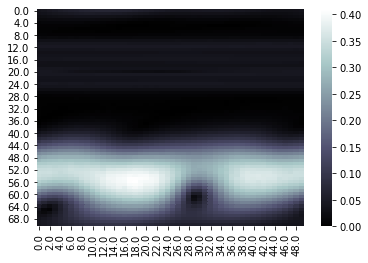

In [100]:
snapshot_0p7_m2_abs= sort_csv(path3+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p7_m2_abs, cmap='bone', vmin=0)

<AxesSubplot:>

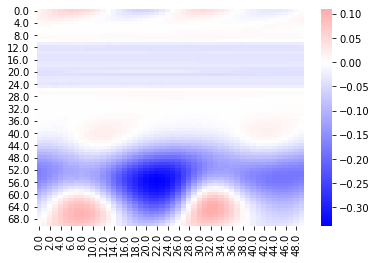

In [104]:
snapshot_0p7_m2_real= sort_csv(path3+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex, fct=(lambda x: x.real))
sb.heatmap(snapshot_0p7_m2_real, cmap='bwr', center=0)

<AxesSubplot:>

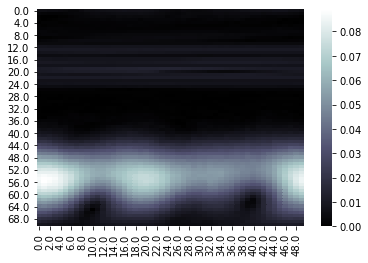

In [101]:
snapshot_0p7_m1p5_abs= sort_csv(path3+"/wavenumber_0.7_alpha_-1.5_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p7_m1p5_abs, cmap='bone', vmin=0)

<AxesSubplot:>

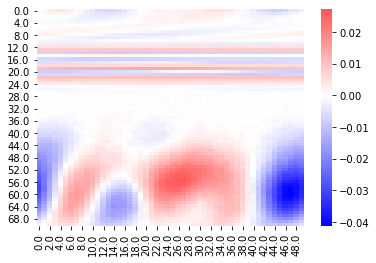

In [105]:
snapshot_0p7_m1p5_real= sort_csv(path3+"/wavenumber_0.7_alpha_-1.5_snapshot.csv", dtype=complex, fct=(lambda x: x.real))
sb.heatmap(snapshot_0p7_m1p5_real, cmap='bwr', center=0)

<AxesSubplot:>

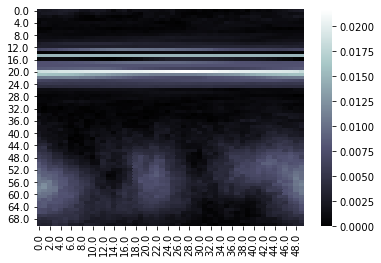

In [107]:
snapshot_0p7_m1_abs= sort_csv(path3+"/wavenumber_0.7_alpha_-1.0_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p7_m1_abs, cmap='bone', vmin=0)

## longer simulations

In [108]:
#high temperature and low temperature one

In [25]:
path4 = "/home/jsk/cylinder/chapter3data/2021-05-08_183025" 
path5 = "/home/jsk/cylinder/chapter3data/2021-05-08_183945" 

In [112]:
infile = os.path.join(path4, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 50000
--field_type lattice
--method  sequential
--alpha -1
--C 1
--u 1
--n 6
--kappa 0
--gamma 10 
--temp .000001
--temp_final .000001
--intrinsic_curvature  0
--amplitude 0  
--radius 1
--wavenumber  1
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100  
--dims 50 50



In [119]:
infile = os.path.join(path5, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 50000
--field_type lattice
--method  sequential
--alpha -1
--C 1
--u 1
--n 6
--kappa 0
--gamma 10 
--temp .0001
--temp_final .000001
--intrinsic_curvature  0
--amplitude 0  
--radius 1
--wavenumber  1
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100  
--dims 50 50



<AxesSubplot:>

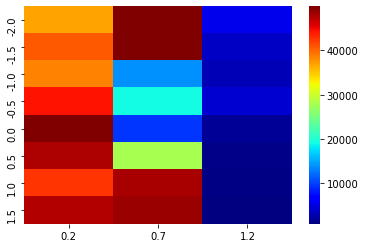

In [114]:
global_cutoff= sort_csv(path4+"/global_cutoff.csv")
sb.heatmap(global_cutoff, cmap='jet')

<AxesSubplot:>

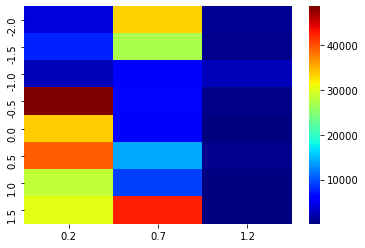

In [120]:
global_cutoff= sort_csv(path5+"/global_cutoff.csv")
sb.heatmap(global_cutoff, cmap='jet')

<AxesSubplot:>

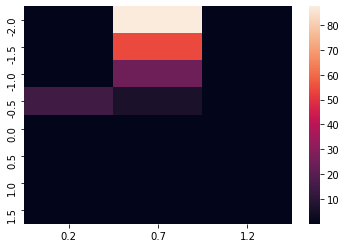

In [116]:
abs_amplitude2= sort_csv(path4+"/field_energy.csv", dtype=complex)
sb.heatmap(abs_amplitude2)

<AxesSubplot:>

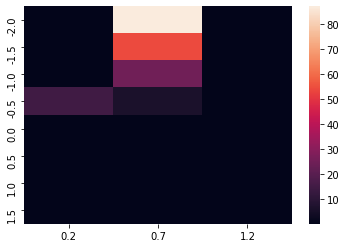

In [121]:
abs_amplitude2= sort_csv(path5+"/field_energy.csv", dtype=complex)
sb.heatmap(abs_amplitude2)

<AxesSubplot:>

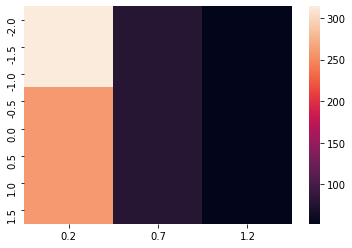

In [118]:
abs_amplitude2= sort_csv(path4+"/surface_energy.csv", dtype=complex)
sb.heatmap(abs_amplitude2)

<AxesSubplot:>

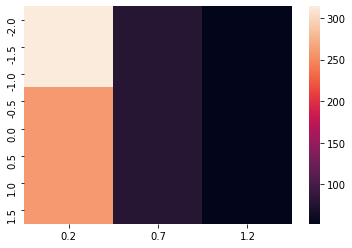

In [122]:
abs_amplitude2= sort_csv(path5+"/surface_energy.csv", dtype=complex)
sb.heatmap(abs_amplitude2)

<AxesSubplot:>

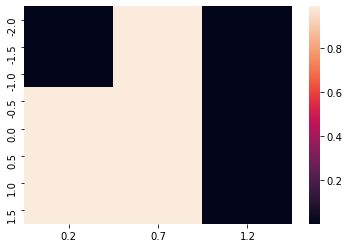

In [117]:
abs_amplitude2= sort_csv(path4+"/abs_amplitude.csv", dtype=complex)
sb.heatmap(abs_amplitude2)

<AxesSubplot:>

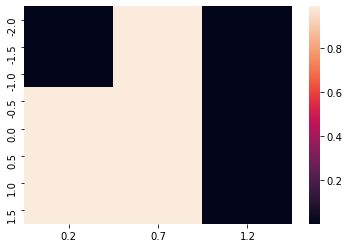

In [123]:
abs_amplitude2= sort_csv(path5+"/abs_amplitude.csv", dtype=complex)
sb.heatmap(abs_amplitude2)

The 100x hotter one looks better for equilibration but they have the same result. The collapse at k=.7 (but not k=.2 ) may be a real effect.

In [188]:
time_data= pd.read_csv(path4+"/wavenumber_0.7_alpha_-2.0.csv")
time_data2= pd.read_csv(path4+"/wavenumber_0.7_alpha_-1.5.csv")
time_data3= pd.read_csv(path5+"/wavenumber_0.7_alpha_-2.0.csv")
time_data4= pd.read_csv(path5+"/wavenumber_0.7_alpha_-1.5.csv")

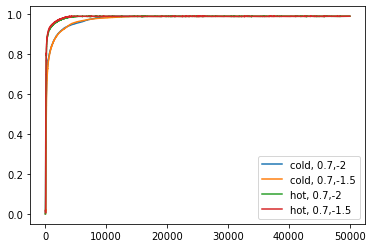

In [189]:
subject="abs_amplitude"
plt.plot([x for x in time_data.loc[:,subject]], label='cold, 0.7,-2')
plt.plot([x for x in time_data2.loc[:,subject]], label='cold, 0.7,-1.5')
plt.plot([x for x in time_data3.loc[:,subject]], label='hot, 0.7,-2')
plt.plot([x for x in time_data4.loc[:,subject]], label='hot, 0.7,-1.5')
plt.legend()

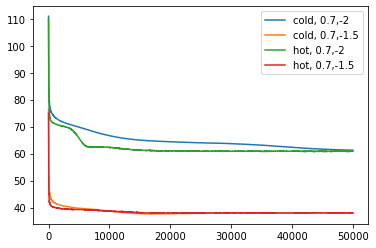

In [207]:
subject="field_energy"
plt.plot([complex(x).real*.7 for x in time_data.loc[:,subject]], label='cold, 0.7,-2')
plt.plot([complex(x).real*.7 for x in time_data2.loc[:,subject]], label='cold, 0.7,-1.5')
plt.plot([complex(x).real*.7 for x in time_data3.loc[:,subject]], label='hot, 0.7,-2')
plt.plot([complex(x).real*.7 for x in time_data4.loc[:,subject]], label='hot, 0.7,-1.5')
plt.legend()
#this could be 0 if perfectly ordered on flat surface

394.78417604357435
62.83185307179586


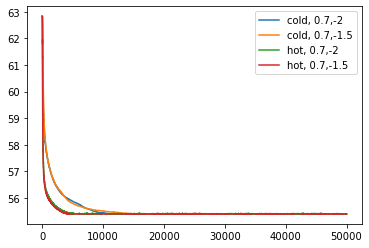

In [209]:
subject="surface_energy"
plt.plot([x*.7 for x in time_data.loc[:,subject]], labe
         l='cold, 0.7,-2')
plt.plot([x*.7 for x in time_data2.loc[:,subject]], label='cold, 0.7,-1.5')
plt.plot([x*.7 for x in time_data3.loc[:,subject]], label='hot, 0.7,-2')
plt.plot([x*.7 for x in time_data4.loc[:,subject]], label='hot, 0.7,-1.5')
plt.legend()
#are there missing factors of 2pi?  expected surface area about:
print(2*math.pi*2*math.pi*10)
print(2*math.pi*10) #printed in file is surface energy of the object / 2pi
#which one is used in calculation to step amplitude?

In [187]:
time_data= pd.read_csv(path4+"/wavenumber_0.2_alpha_-2.0.csv")
time_data2= pd.read_csv(path4+"/wavenumber_0.2_alpha_-1.5.csv")
time_data3= pd.read_csv(path5+"/wavenumber_0.2_alpha_-2.0.csv")
time_data4= pd.read_csv(path5+"/wavenumber_0.2_alpha_-1.5.csv")

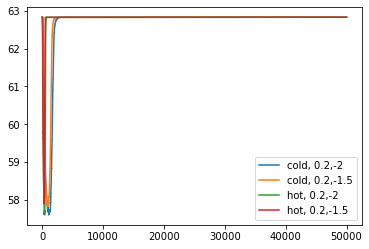

In [180]:
subject="surface_energy"
plt.plot([x*.2 for x in time_data.loc[:,subject]], label='cold, 0.2,-2')
plt.plot([x*.2 for x in time_data2.loc[:,subject]], label='cold, 0.2,-1.5')
plt.plot([x*.2 for x in time_data3.loc[:,subject]], label='hot, 0.2,-2')
plt.plot([x*.2 for x in time_data4.loc[:,subject]], label='hot, 0.2,-1.5')
plt.legend()

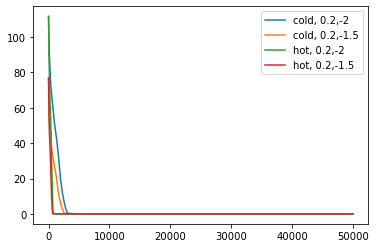

In [182]:
subject="field_energy"
plt.plot([complex(x).real*.2 for x in time_data.loc[:,subject]], label='cold, 0.2,-2')
plt.plot([complex(x).real*.2 for x in time_data2.loc[:,subject]], label='cold, 0.2,-1.5')
plt.plot([complex(x).real*.2 for x in time_data3.loc[:,subject]], label='hot, 0.2,-2')
plt.plot([complex(x).real*.2 for x in time_data4.loc[:,subject]], label='hot, 0.2,-1.5')
plt.legend()

25000 steps at the hotter temperature should be sufficient

<AxesSubplot:>

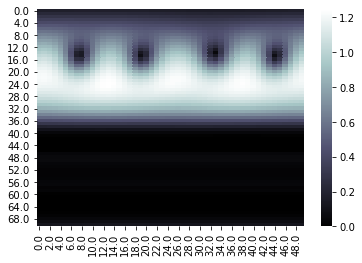

In [133]:
snapshot_0p7_m2_abs= sort_csv(path4+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p7_m2_abs, cmap='bone', vmin=0)

<AxesSubplot:>

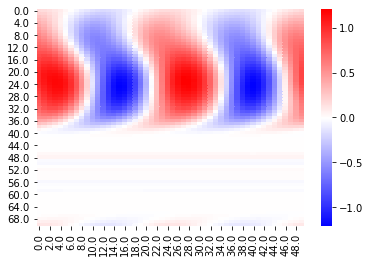

In [134]:
snapshot_0p7_m2_real= sort_csv(path4+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex, fct=(lambda x: x.real))
sb.heatmap(snapshot_0p7_m2_real, cmap='bwr', center=0)

<AxesSubplot:>

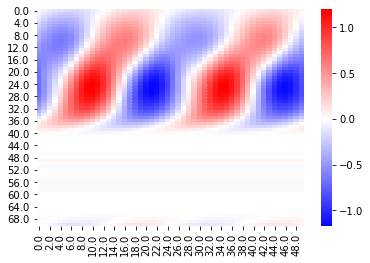

In [136]:
snapshot_0p7_m2_imag= sort_csv(path4+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex, fct=(lambda x: x.imag))
sb.heatmap(snapshot_0p7_m2_imag, cmap='bwr', center=0)

<AxesSubplot:>

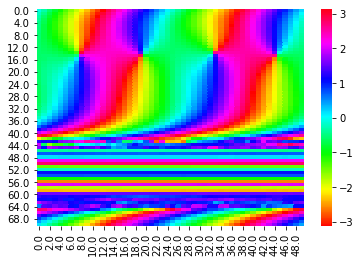

In [156]:
snapshot_0p7_m2_imag= sort_csv(path4+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex, fct=(lambda x: cmath.phase(x)))
sb.heatmap(snapshot_0p7_m2_imag, cmap='hsv')

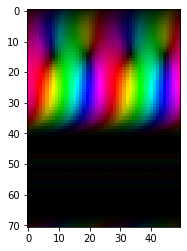

In [173]:
complex_heatmap(path4+"/wavenumber_0.7_alpha_-2.0_snapshot.csv")

This one has 2x rotations with a change in direction and defects

<AxesSubplot:>

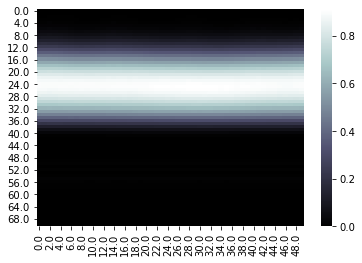

In [128]:
snapshot_0p7_m1p5_abs= sort_csv(path4+"/wavenumber_0.7_alpha_-1.5_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p7_m1p5_abs, cmap='bone', vmin=0)

<AxesSubplot:>

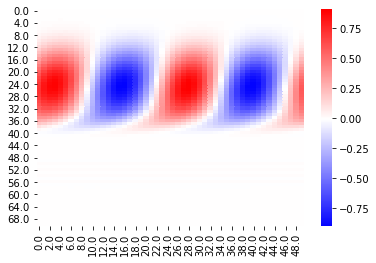

In [129]:
snapshot_0p7_m1p5_real= sort_csv(path4+"/wavenumber_0.7_alpha_-1.5_snapshot.csv", dtype=complex, fct=(lambda x: x.real))
sb.heatmap(snapshot_0p7_m1p5_real, cmap='bwr', center=0)

<AxesSubplot:>

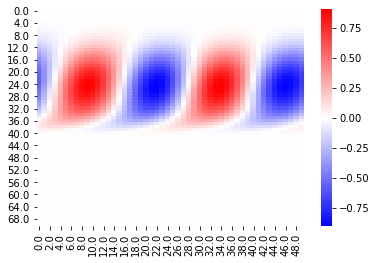

In [131]:
snapshot_0p7_m1p5_imag= sort_csv(path4+"/wavenumber_0.7_alpha_-1.5_snapshot.csv", dtype=complex, fct=(lambda x: x.imag))
sb.heatmap(snapshot_0p7_m1p5_imag, cmap='bwr', center=0)

<AxesSubplot:>

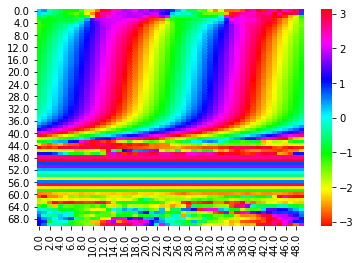

In [154]:
snapshot_0p7_m2_imag= sort_csv(path4+"/wavenumber_0.7_alpha_-1.5_snapshot.csv", dtype=complex, fct=(lambda x: cmath.phase(x)))
sb.heatmap(snapshot_0p7_m2_imag, cmap='hsv')

2x rotation without defect

<AxesSubplot:>

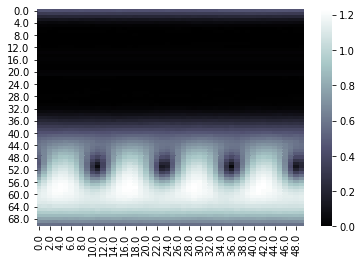

In [137]:
snapshot_0p7_m2_abs= sort_csv(path5+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p7_m2_abs, cmap='bone', vmin=0)

<AxesSubplot:>

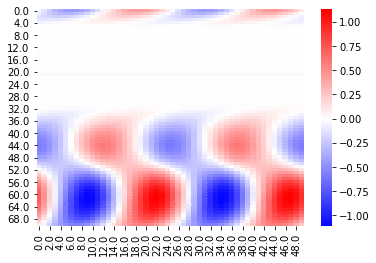

In [138]:
snapshot_0p7_m2_real= sort_csv(path5+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex, fct=(lambda x: x.real))
sb.heatmap(snapshot_0p7_m2_real, cmap='bwr', center=0)

<AxesSubplot:>

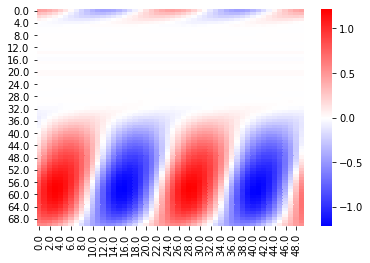

In [139]:
snapshot_0p7_m2_imag= sort_csv(path5+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex, fct=(lambda x: x.imag))
sb.heatmap(snapshot_0p7_m2_imag, cmap='bwr', center=0)

<AxesSubplot:>

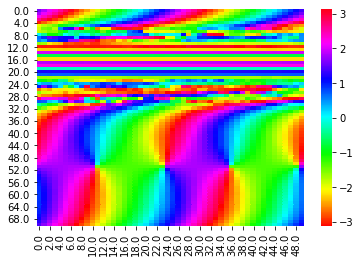

In [153]:
snapshot_0p7_m2_imag= sort_csv(path5+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex, fct=(lambda x: cmath.phase(x)))
sb.heatmap(snapshot_0p7_m2_imag, cmap='hsv')

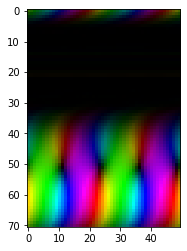

In [176]:
complex_heatmap(path5+"/wavenumber_0.7_alpha_-2.0_snapshot.csv")

<AxesSubplot:>

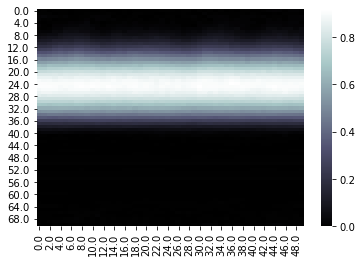

In [140]:
snapshot_0p7_m1p5_abs= sort_csv(path5+"/wavenumber_0.7_alpha_-1.5_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p7_m1p5_abs, cmap='bone', vmin=0)

<AxesSubplot:>

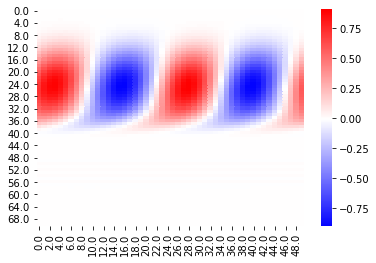

In [141]:
snapshot_0p7_m1p5_real= sort_csv(path4+"/wavenumber_0.7_alpha_-1.5_snapshot.csv", dtype=complex, fct=(lambda x: x.real))
sb.heatmap(snapshot_0p7_m1p5_real, cmap='bwr', center=0)

<AxesSubplot:>

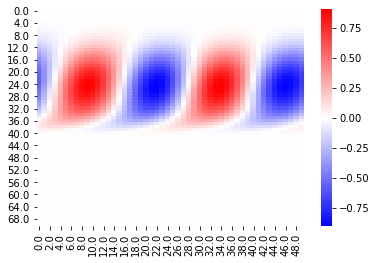

In [146]:
snapshot_0p7_m1p5_imag= sort_csv(path4+"/wavenumber_0.7_alpha_-1.5_snapshot.csv", dtype=complex, fct=(lambda x: x.imag))
sb.heatmap(snapshot_0p7_m1p5_imag, cmap='bwr', center=0)

<AxesSubplot:>

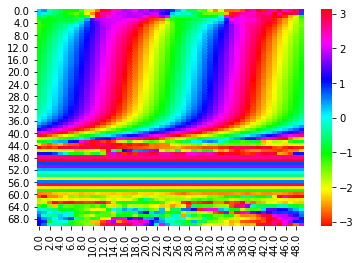

In [151]:
snapshot_0p7_m1p5_imag= sort_csv(path4+"/wavenumber_0.7_alpha_-1.5_snapshot.csv", dtype=complex, fct=(lambda x: cmath.phase(x)))
sb.heatmap(snapshot_0p7_m1p5_imag, cmap='hsv')

Same story with higher temperature

<AxesSubplot:>

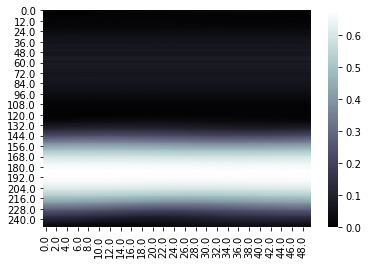

In [142]:
snapshot_0p2_m0p5_abs= sort_csv(path4+"/wavenumber_0.2_alpha_-0.5_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p2_m0p5_abs, cmap='bone', vmin=0)


<AxesSubplot:>

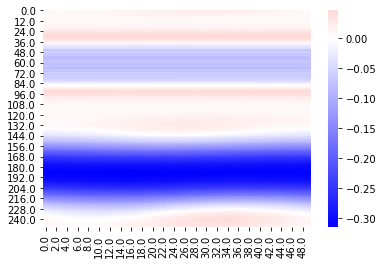

In [144]:
snapshot_0p2_m0p5_real= sort_csv(path4+"/wavenumber_0.2_alpha_-0.5_snapshot.csv", dtype=complex, fct=(lambda x: x.real))
sb.heatmap(snapshot_0p2_m0p5_real, cmap='bwr', center=0)

<AxesSubplot:>

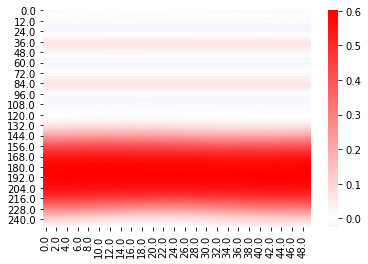

In [145]:
snapshot_0p2_m0p5_real= sort_csv(path4+"/wavenumber_0.2_alpha_-0.5_snapshot.csv", dtype=complex, fct=(lambda x: x.imag))
sb.heatmap(snapshot_0p2_m0p5_real, cmap='bwr', center=0)

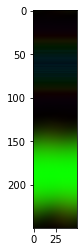

In [175]:
complex_heatmap(path4+"/wavenumber_0.2_alpha_-0.5_snapshot.csv")

irrotational compromise at this one

Why the non-development of field on narrow neck?  Is it dynamically prevented due to high gradient costs here?  These are not fully developed minimum solutions, because of 0 field on narrow part.  High cost of fluctuations, differences betweeen anisotropic cells prevents either shape development or field development on his region.  !Rotational mode on narrow neck costs more energy than elsewhere - gradient energy is not scale invariant in case of anisotropy.  Gradient energy increased (1/l_th )^2, decreased only x (l_th l_z).  This effect is real.  Gradient energy of 1D patterns is not scale invariant.  Balance between dth^2, dthAth, Ath^2 terms is invariant.  Its balance with surface energy, field magnitude energy is not.  Defects also cost more (per area served) on narrow neck.  

less c, also I give field a head start of 100 rounds now before moving surface away from 0


In [15]:
path6 = "/home/jsk/cylinder/chapter3data/2021-05-11_173534" 

In [16]:
infile = os.path.join(path6, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 20000
--field_type lattice
--method  sequential
--alpha -1
--C .01
--u 1
--n 6
--kappa 0
--gamma 10 
--temp .0001
--temp_final .000001
--intrinsic_curvature  0
--amplitude 0
--radius 1
--wavenumber  1
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100  
--dims 50 50



<AxesSubplot:>

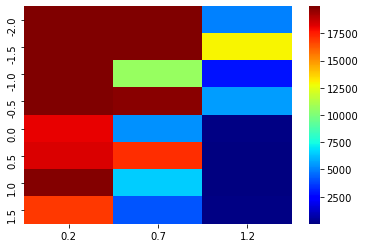

In [17]:
global_cutoff= sort_csv(path6+"/global_cutoff.csv")
sb.heatmap(global_cutoff, cmap='jet')

<AxesSubplot:>

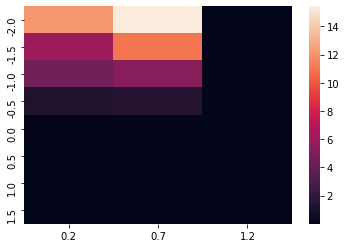

In [18]:
abs_amplitude2= sort_csv(path6+"/field_energy.csv", dtype=complex)
sb.heatmap(abs_amplitude2)

<AxesSubplot:>

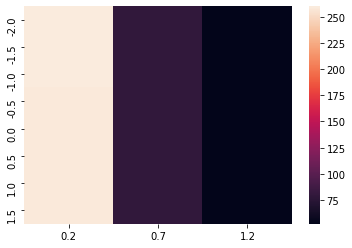

In [19]:
abs_amplitude2= sort_csv(path6+"/surface_energy.csv", dtype=complex)
sb.heatmap(abs_amplitude2)

<AxesSubplot:>

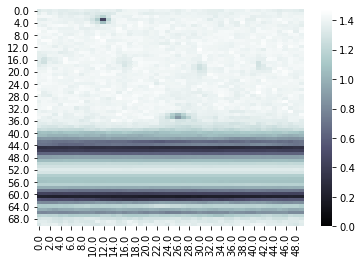

In [21]:
snapshot= sort_csv(path6+"/wavenumber_0.7_alpha_-2.0_snapshot.csv", dtype=complex)
sb.heatmap(snapshot, cmap='bone', vmin=0)

As predicted in non-rotational profiles, at low c we see the development of narrow field stripe on narrow neck

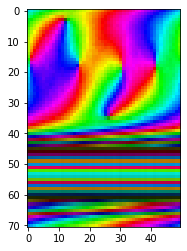

In [22]:
complex_heatmap(path6+"/wavenumber_0.7_alpha_-2.0_snapshot.csv")

Has the right defects, not fully equilibrated?  very interesting +1, +2, -2, -1 rotational modes


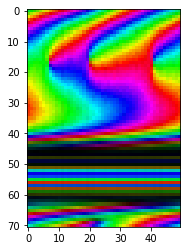

In [23]:
complex_heatmap(path6+"/wavenumber_0.7_alpha_-1.5_snapshot.csv")

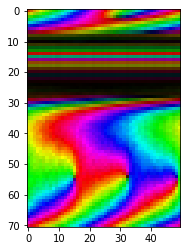

In [24]:
complex_heatmap(path6+"/wavenumber_0.7_alpha_-1.0_snapshot.csv")

Unexpected 3 defects instead of 2 or 4 - a 4th one not in the line.  The 3 defects separate +1, -2 rotation zones. (The one below separrates -2, -1).  

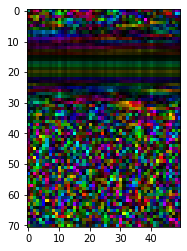

In [27]:
complex_heatmap(path6+"/wavenumber_0.7_alpha_1.0_snapshot.csv")

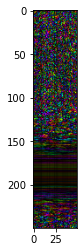

In [28]:
complex_heatmap(path6+"/wavenumber_0.2_alpha_1.0_snapshot.csv")

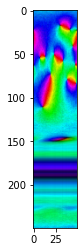

In [29]:
complex_heatmap(path6+"/wavenumber_0.2_alpha_-1.0_snapshot.csv")

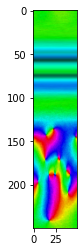

In [30]:
complex_heatmap(path6+"/wavenumber_0.2_alpha_-1.5_snapshot.csv")

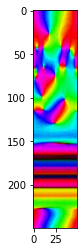

In [31]:
complex_heatmap(path6+"/wavenumber_0.2_alpha_-2.0_snapshot.csv")

cool but not equilibrated

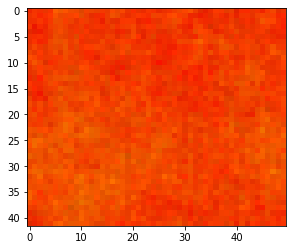

In [32]:
complex_heatmap(path6+"/wavenumber_1.2_alpha_-1.0_snapshot.csv")

check out higher c simulations, C=1 like original, but with field given a head start:


In [37]:
path7 = "/home/jsk/cylinder/chapter3data/2021-05-11_205124" 